In [1]:
import numpy
from keras.datasets import mnist
from keras.models import Sequential
from keras.layers import Dense
from keras.utils import np_utils
import matplotlib.pyplot as plt

Using TensorFlow backend.


In [2]:
seed = 7
numpy.random.seed(seed)


In [3]:
# load data
(X_train, y_train), (X_test, y_test) = mnist.load_data()


In [4]:
num_pixels = X_train.shape[1] * X_train.shape[2]
X_train = X_train.reshape(X_train.shape[0], num_pixels).astype('float32')
X_test = X_test.reshape(X_test.shape[0], num_pixels).astype('float32')

In [5]:
X_train = X_train / 255
X_test = X_test / 255

In [6]:
y_train = np_utils.to_categorical(y_train)
y_test = np_utils.to_categorical(y_test)
num_classes = y_test.shape[1]

In [7]:
def baseline_model():
	# create model
	model = Sequential()
	model.add(Dense(num_pixels, input_dim=num_pixels, kernel_initializer='normal', activation='relu'))
	model.add(Dense(num_classes, kernel_initializer='normal', activation='softmax'))
	# Compile model
	model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
	return model


In [12]:
model = baseline_model()
model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=25, batch_size=200, verbose=2)
history = model.fit(X_train, y_train, nb_epoch=10, validation_split=0.2, shuffle=True)
# Final evaluation of the model
scores = model.evaluate(X_test, y_test, verbose=0)
print(" Error: %.2f%%" % (100-scores[1]*100))
print(model.summary())


Train on 60000 samples, validate on 10000 samples
Epoch 1/25
 - 12s - loss: 0.2798 - acc: 0.9203 - val_loss: 0.1399 - val_acc: 0.9568
Epoch 2/25
 - 12s - loss: 0.1118 - acc: 0.9676 - val_loss: 0.0912 - val_acc: 0.9735
Epoch 3/25
 - 12s - loss: 0.0718 - acc: 0.9790 - val_loss: 0.0730 - val_acc: 0.9779
Epoch 4/25
 - 12s - loss: 0.0488 - acc: 0.9861 - val_loss: 0.0659 - val_acc: 0.9792
Epoch 5/25
 - 12s - loss: 0.0364 - acc: 0.9900 - val_loss: 0.0622 - val_acc: 0.9801
Epoch 6/25
 - 11s - loss: 0.0266 - acc: 0.9929 - val_loss: 0.0602 - val_acc: 0.9817
Epoch 7/25
 - 12s - loss: 0.0191 - acc: 0.9954 - val_loss: 0.0635 - val_acc: 0.9797
Epoch 8/25
 - 12s - loss: 0.0150 - acc: 0.9966 - val_loss: 0.0605 - val_acc: 0.9819
Epoch 9/25
 - 12s - loss: 0.0108 - acc: 0.9977 - val_loss: 0.0659 - val_acc: 0.9810
Epoch 10/25
 - 12s - loss: 0.0083 - acc: 0.9985 - val_loss: 0.0587 - val_acc: 0.9820
Epoch 11/25
 - 12s - loss: 0.0061 - acc: 0.9990 - val_loss: 0.0561 - val_acc: 0.9831
Epoch 12/25
 - 12s - los

c:\python35\lib\site-packages\keras\models.py:942: UserWarning: The `nb_epoch` argument in `fit` has been renamed `epochs`.
  warnings.warn('The `nb_epoch` argument in `fit` '


48000/48000 [==============================] - 37s 762us/step - loss: 0.0549 - acc: 0.9848 - val_loss: 0.0232 - val_acc: 0.9920
Epoch 2/10
48000/48000 [==============================] - 38s 802us/step - loss: 0.0178 - acc: 0.9936 - val_loss: 0.0248 - val_acc: 0.9927
Epoch 3/10
48000/48000 [==============================] - 38s 798us/step - loss: 0.0143 - acc: 0.9952 - val_loss: 0.0390 - val_acc: 0.9882
Epoch 4/10
48000/48000 [==============================] - 38s 795us/step - loss: 0.0139 - acc: 0.9952 - val_loss: 0.0382 - val_acc: 0.9882
Epoch 5/10
48000/48000 [==============================] - 36s 745us/step - loss: 0.0118 - acc: 0.9961 - val_loss: 0.0440 - val_acc: 0.9867
Epoch 6/10
48000/48000 [==============================] - 34s 703us/step - loss: 0.0138 - acc: 0.9955 - val_loss: 0.0375 - val_acc: 0.9883
Epoch 7/10
48000/48000 [==============================] - 36s 749us/step - loss: 0.0104 - acc: 0.9964 - val_loss: 0.0714 - val_acc: 0.9824
Epoch 8/10
48000/48000 [==============

dict_keys(['val_loss', 'loss', 'val_acc', 'acc'])


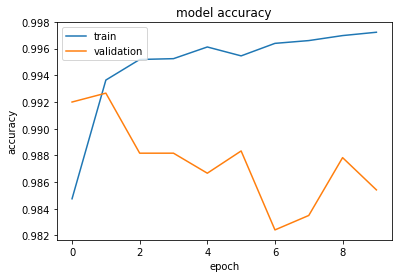

In [13]:
print(history.history.keys())
#  "Accuracy"
plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()

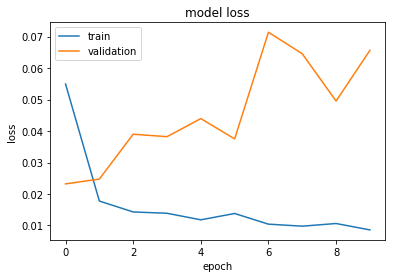

In [14]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()